# Census Income Project

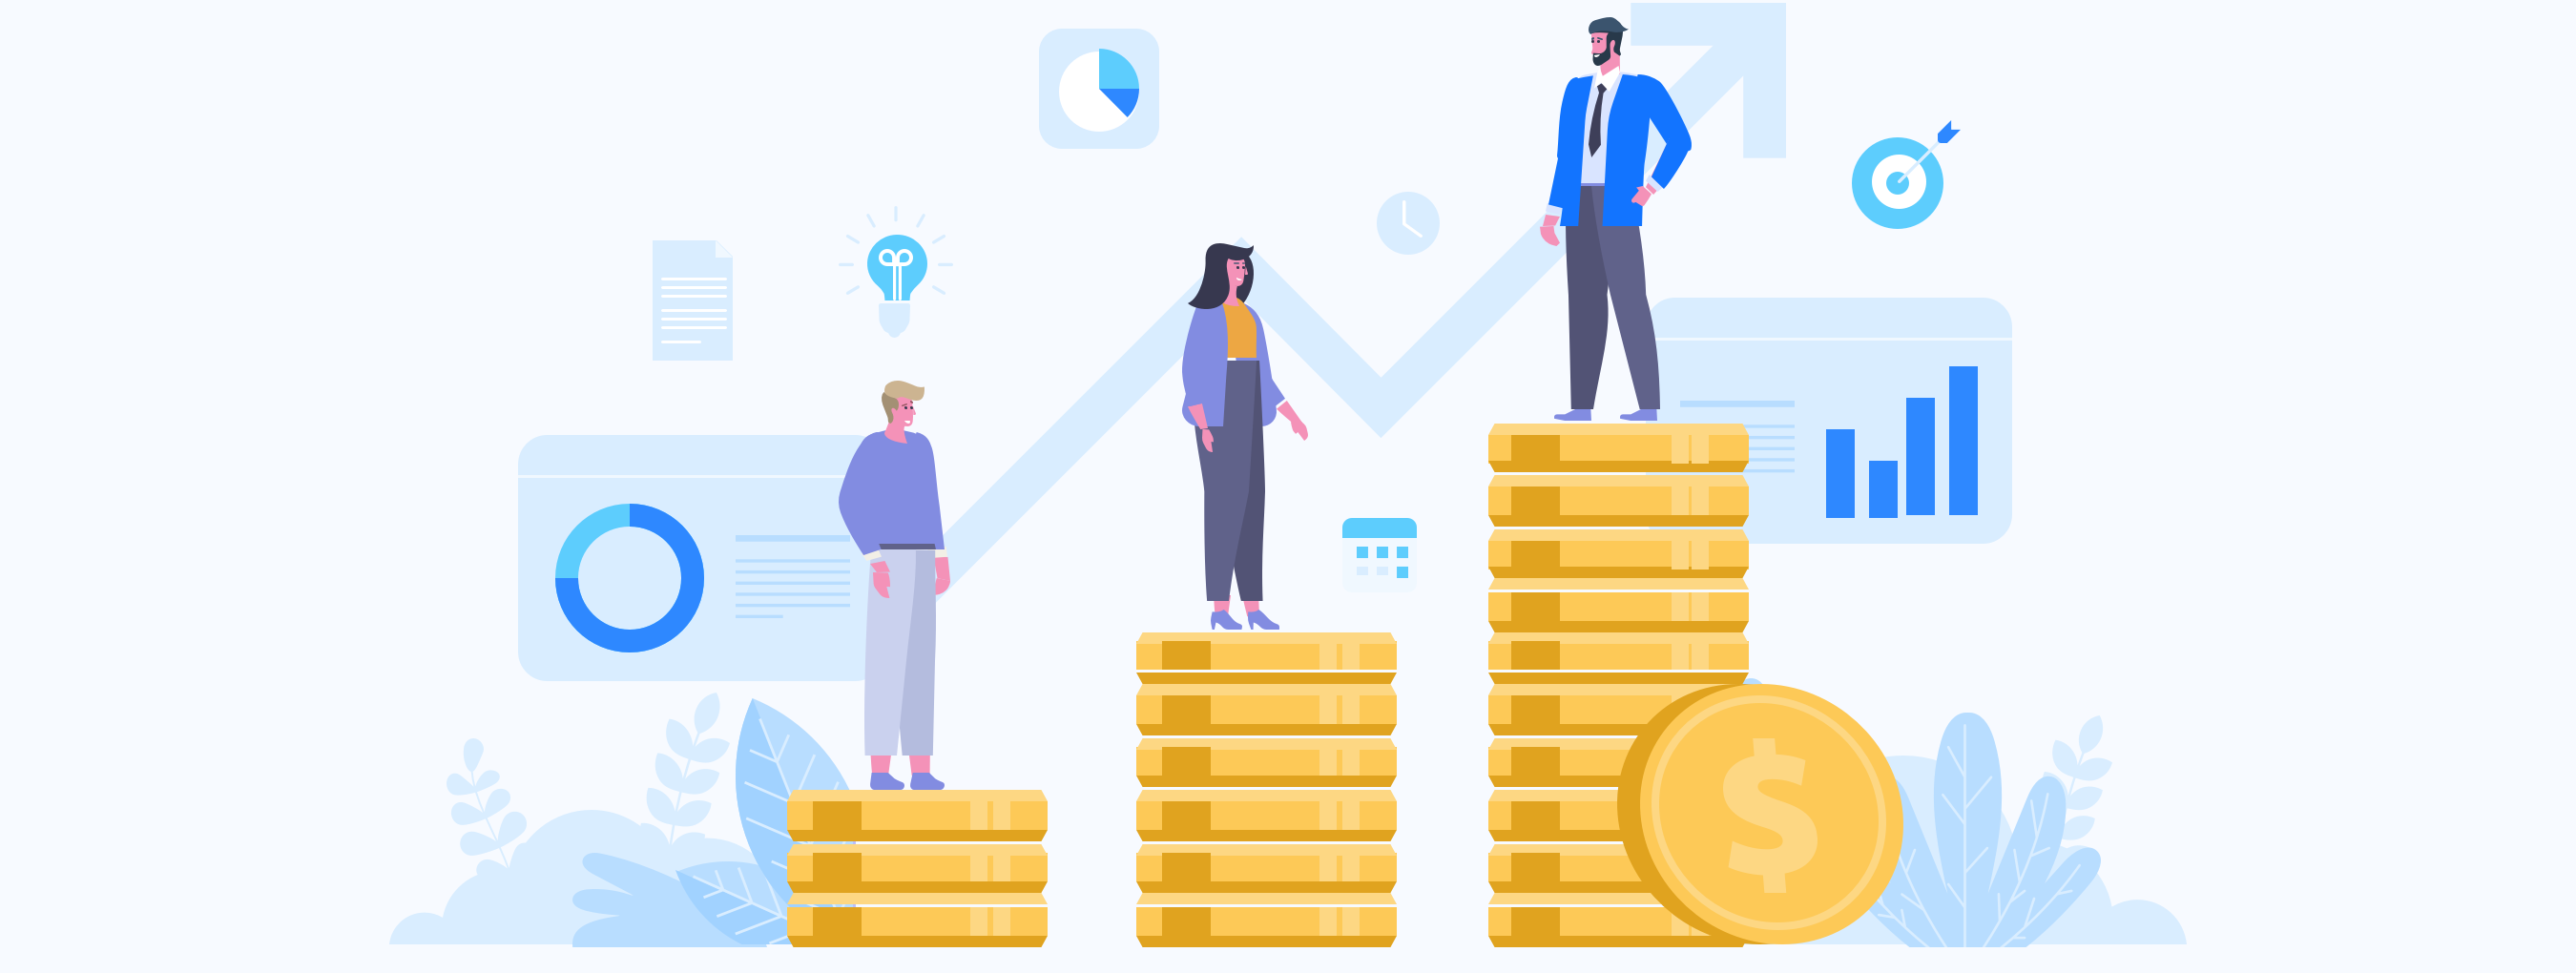

Dataset  

    This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).  


Input features

    1.	Age 
    2.	Workclass
    3.	Fnlwgt 
    4.	Education_num 
    5.	Education 
    6.	Marital_status 
    7.	Occupation 
    8.	Relationship 
    9.	Race 
    10.	Sex 
    11.	Capital_gain
    12.	Capital_loss
    13.  Hours_per_week
    14.  Native_country


Output label  
    
    Income
    

Aim: 
 
    Develop machine learning models to predict whether a person makes over $50K a year (Classification model).

In [239]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [240]:
# load the dataset

cen=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")

cen.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Data pre-processing, Feature engineering & EDA

In [241]:
# create a copy of the dataset for analysis

cen_df=cen.copy()

In [242]:
cen_df.shape

(32560, 15)

In [243]:
cen_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [244]:
# check for duplicates

duplicates=cen_df.duplicated()

print('No. of duplicates in the dataset: ', cen_df.duplicated().sum())
print('Index of duplicates in the dataset: ', cen_df[duplicates].index)

No. of duplicates in the dataset:  24
Index of duplicates in the dataset:  Index([ 4880,  5103,  9170, 11630, 13083, 15058, 17039, 18554, 18697, 21317,
       21489, 21874, 22299, 22366, 22493, 25871, 26312, 28229, 28521, 28845,
       29156, 30844, 31992, 32403],
      dtype='int64')


In [245]:
# remove duplicated record

cen_df.drop_duplicates(inplace=True)
print('No. of duplicates after cleaning: ', cen_df.duplicated().sum())
print('No. of rows after cleaning: ', cen_df.shape[0])

No. of duplicates after cleaning:  0
No. of rows after cleaning:  32536


In [246]:
cen_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [247]:
cen_df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation:  

    There are 15 columns and 32536 records in the dataset
    There are no nulls
    The 15 columns have these datatypes: int64(6), object(9)

In [248]:
# check number of unique values in each column

unique=cen_df.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [249]:
# take the count of each unique value in each column

for i in cen_df.columns:
    print(cen_df.value_counts(cen_df[i]),'\n')

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
85      3
88      3
86      1
87      1
Name: count, Length: 73, dtype: int64 

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64 

Fnlwgt
123011     13
164190     13
203488     13
148995     12
113364     12
           ..
158762      1
158776      1
158784      1
158800      1
1484705     1
Name: count, Length: 21647, dtype: int64 

Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Presc

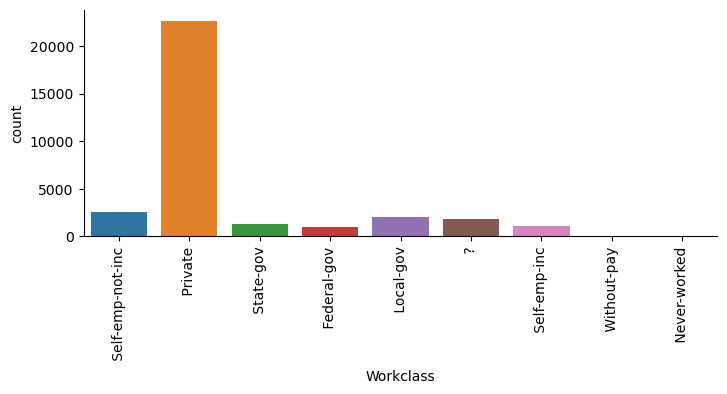

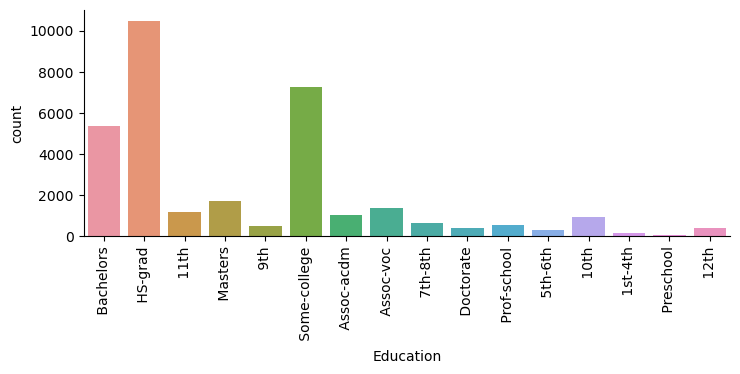

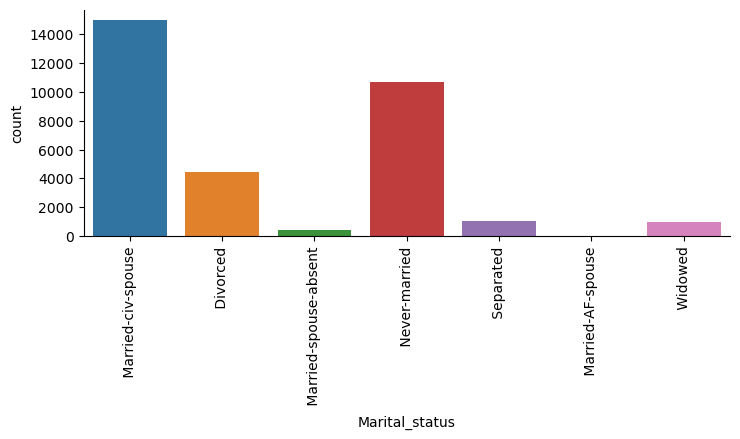

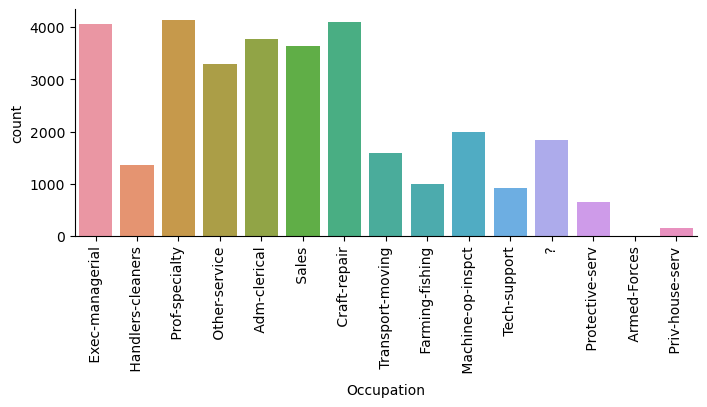

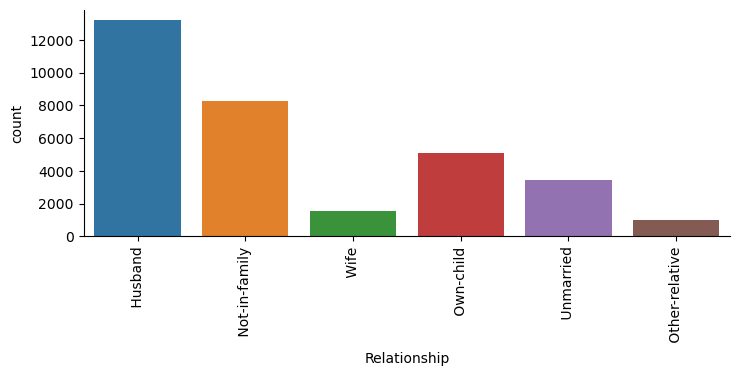

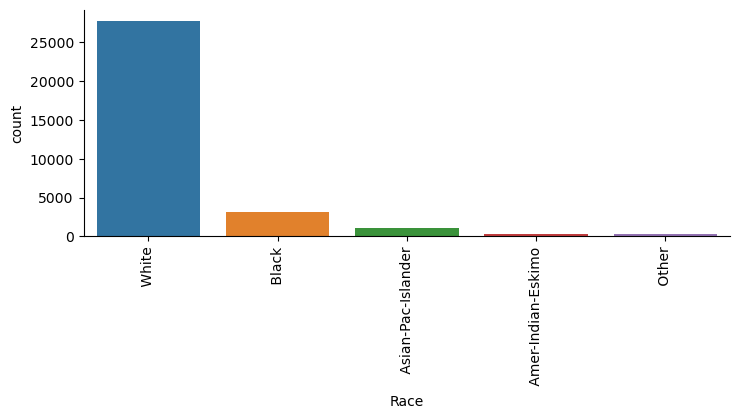

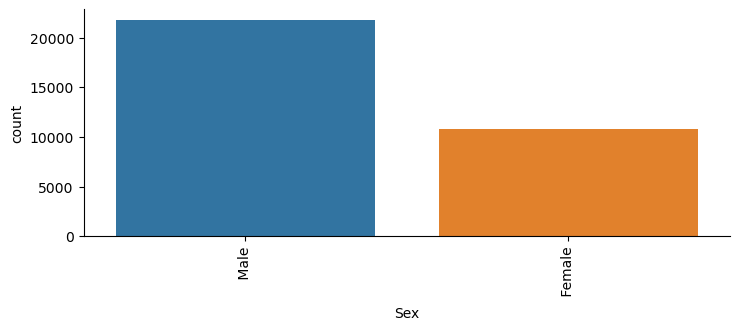

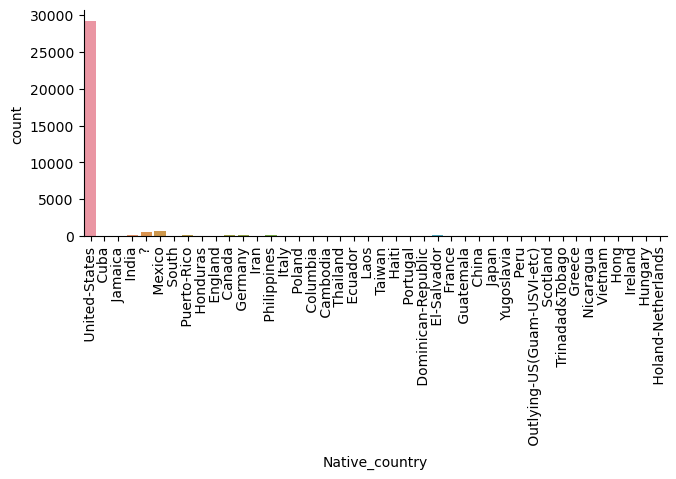

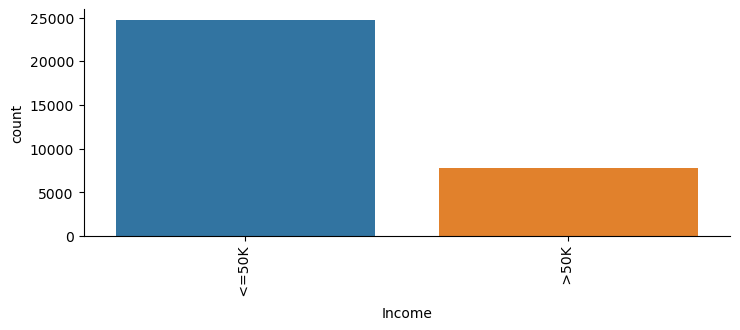

In [250]:
# view the frequency of categorical features

cat=cen_df.select_dtypes(include='object')

for col in cat.columns:
    sns.catplot(x=col,data=cen_df,kind='count',height=3,aspect=2.5)
    plt.xticks(rotation=90)
    plt.show()

Observation:  

    The census data covered more private working class than others
    The education status of most individuals were High-school graduation
    Education and education_num have the same data in different datatypes
    14970 people are married and living with their spouse
    Top 3 common occupations are craft repair, professional-speciality and executive-managerial
    White people represents majority of the population
    Male gender (especially married husbands) is prominent in the dataset
    Majority people have zero capital gain/loss
    Common working hours is 40h/week
    Data represents USA mostly
    Income category explains that most people earn less than or equal to $50,000 per year

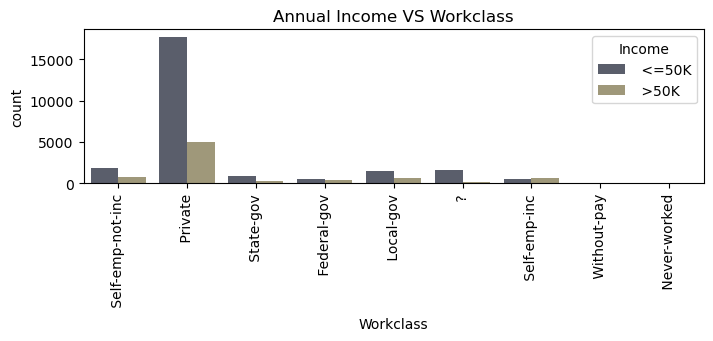

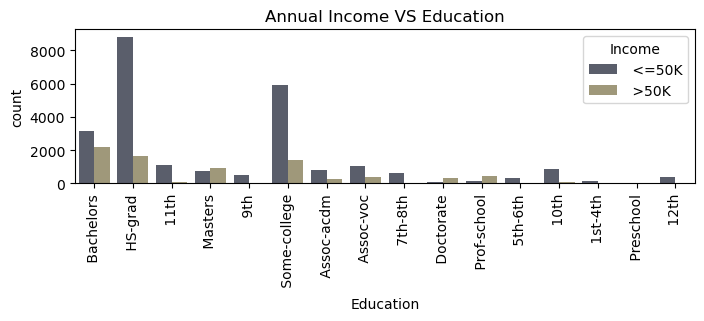

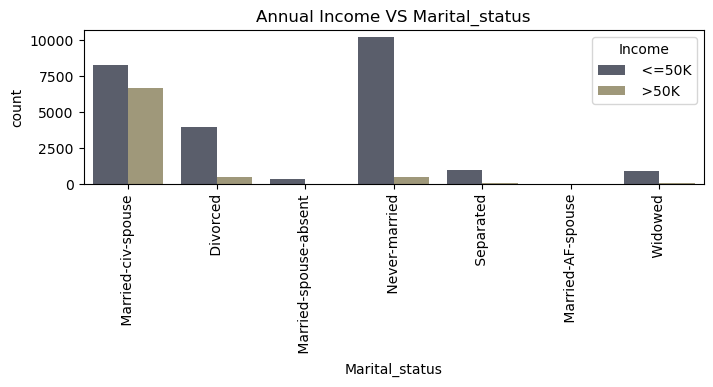

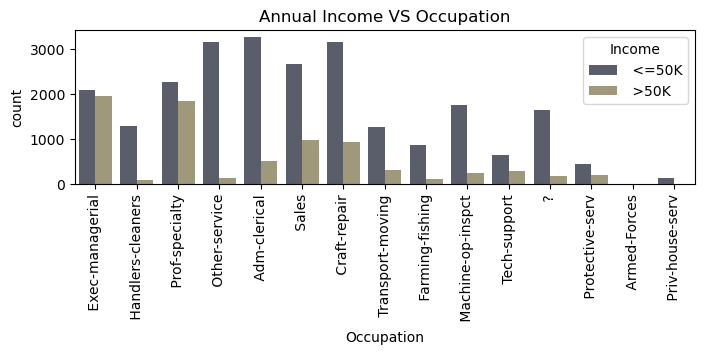

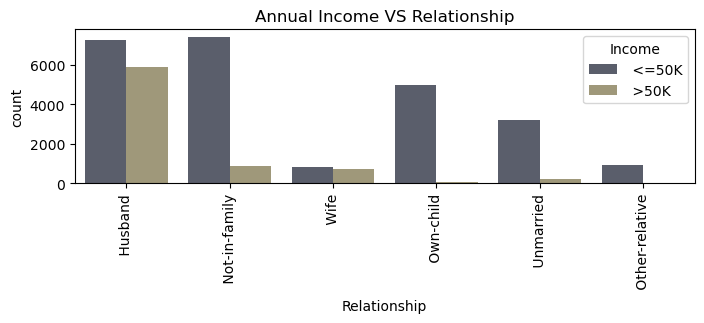

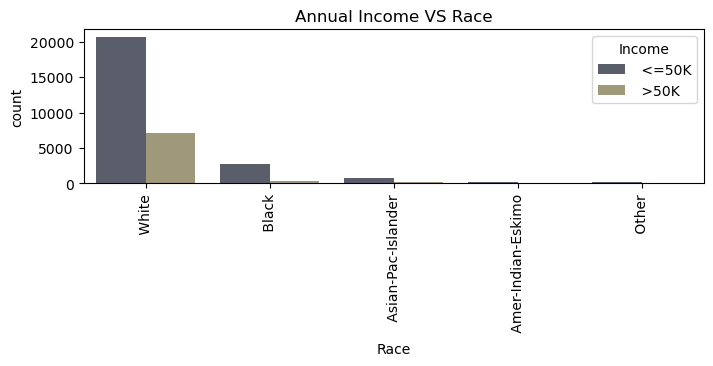

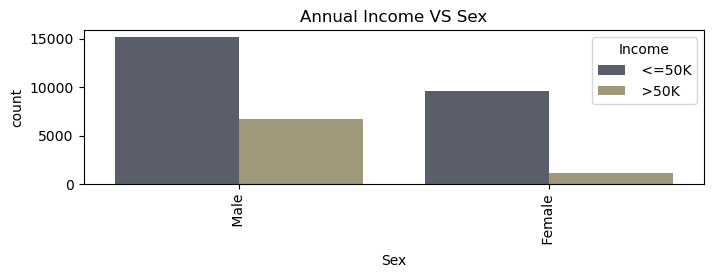

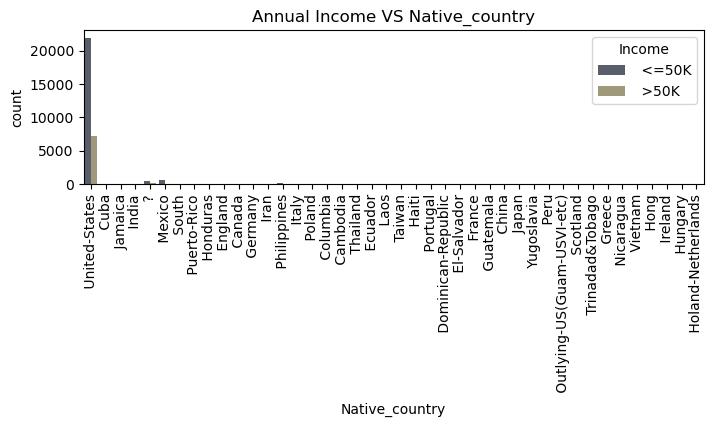

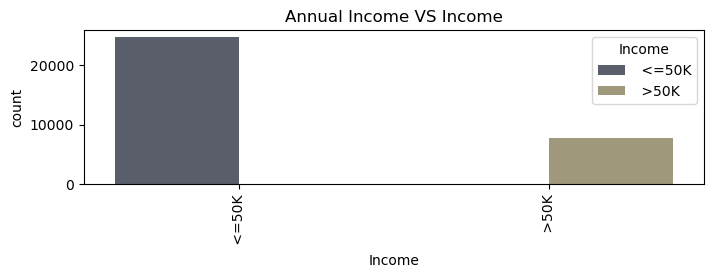

In [251]:
# plot Income vs categorical features

cat=cen_df.select_dtypes(include=['object'])

for i in cat.columns:
    plt.figure(figsize=(8,2))
    sns.countplot(x=i,hue='Income', data=cen_df,palette='cividis')
    plt.xticks(rotation=90)
    plt.title(f'Annual Income VS {i}')
    plt.show()

In [256]:
cen_df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

There is trailing spaces in the values which needs to be stripped off

In [253]:
# remove trailing spaces from the items of all columns

cat=cen_df.select_dtypes(include=['object'])
for col in cat.columns:
    cen_df[col]=cen_df[col].str.strip()

In [254]:
# percentage of people working in different Workclass

priv_high=len(cen_df[(cen_df['Workclass']=='Private') & (cen_df['Income']=='>50K')])/len(cen_df[cen_df['Workclass']=='Private'])*100
priv_low=len(cen_df[(cen_df['Workclass']=='Private') & (cen_df['Income']=='<=50K')])/len(cen_df[cen_df['Workclass']=='Private'])*100

print(f'Percentage of people working in private sector with income >50K: {priv_high:.2f}%')
print(f'Percentage of people working in private sector with income <=50K: {priv_low:.2f}%')

Percentage of people working in private sector with income >50K: 21.88%
Percentage of people working in private sector with income <=50K: 78.12%


In [255]:
# percentage of people having different income types

less_inc=len(cen_df[cen_df['Income']=='<=50K'])/len(cen_df)*100
high_inc=len(cen_df[cen_df['Income']=='>50K'])/len(cen_df)*100

print(f'Percentage of people having annual income <=50K: {less_inc:.2f}%')
print(f'Percentage of people having annual income >50K: {high_inc:.2f}%')

Percentage of people having annual income <=50K: 75.91%
Percentage of people having annual income >50K: 24.09%


Observation:  

    75.91% of the population have annual income <=50K
    24.09% of the population have annual income >50K
    78.12% private employees earn income <=50K while 21.88% earn ncome >50K
    People with HS graduation earn income <=50K while people with bachelors degree is found to earn >50K 
    Majority of married people tend to earn >50K which can be because of the increased responsibilities. Unmarried people majorly earns <=50K
    Majority of Admn-clerical earns <=50K while Exec-managerial tends to earn more
    Male gender earns more than female gender which maybe due to the inequal gender proportion in the sampling   

In [259]:
# percentage of people working in different Workclass

work=len(cen_df[cen_df['Workclass']=='Private'])/len(cen_df)*100

print(f'Percentage of people working in private sector: {work:.2f}%')

Percentage of people working in private sector: 69.69%


In [260]:
# percentage of people representing different Race

race=len(cen_df[cen_df['Race']=='White'])/len(cen_df)*100

print(f'Percentage of people belonging to white race: {race:.2f}%')

Percentage of people belonging to white race: 85.43%


In [261]:
cen_df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation:  

    Average age of the population is 38.5

In [262]:
cen_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


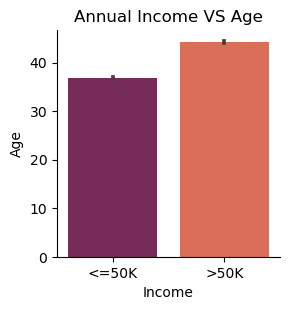

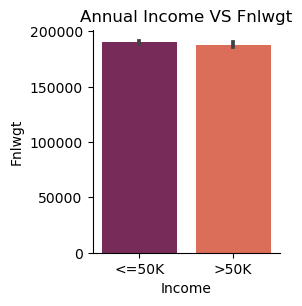

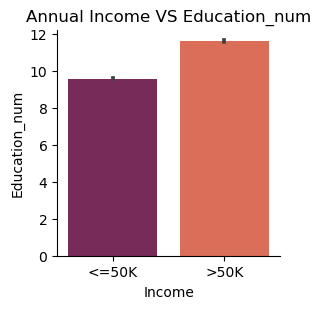

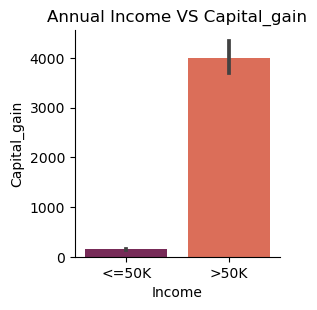

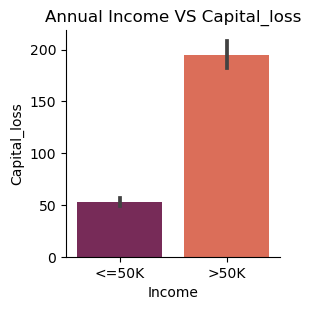

In [263]:
# plot Income vs numerical features

num=cen_df.select_dtypes(include=['float','int'])

for i in num.columns[:-1]:
    
    sns.catplot(x='Income',y=i, data=cen_df,kind='bar',height=3,palette='rocket')
    plt.title(f'Annual Income VS {i}')
    plt.show()

Observation:  

    Income is slighly higher for people with more age
    Weights are equally distributed for both categories of income
    Education level is higher for high-income class
    Capital gain and loss is signifcantly high for people with >50K income
    

<Axes: xlabel='Income', ylabel='Hours_per_week'>

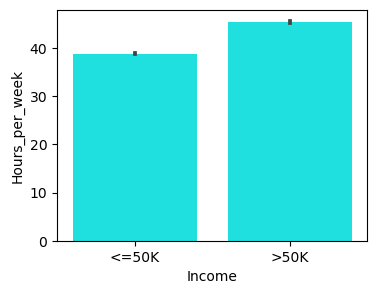

In [265]:
# plot hrs/week with income

plt.figure(figsize=(4,3))
sns.barplot(y='Hours_per_week',x='Income',data=cen_df,color='cyan')

In [266]:
hr=len(cen_df[(cen_df['Hours_per_week']>=40) & (cen_df['Income']=='>50K')])/len(cen_df)*100

print(f'Percentage of people who works 40 hrs/week and earns >50K : {hr:.2f}%')

Percentage of people who works 40 hrs/week and earns >50K : 21.83%


Observation:  

    21.83% people who has worked for more than the average 40 hrs/week work hours, earns >50K income

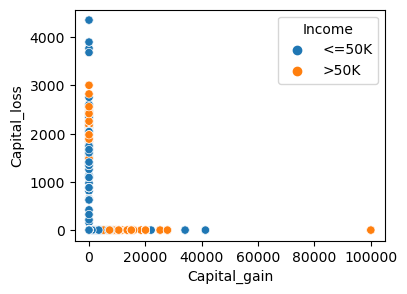

In [267]:
# plot capital gains and losses

plt.figure(figsize=(4,3))
sns.scatterplot(x='Capital_gain',y='Capital_loss',hue='Income',data=cen_df)
plt.show()

Observation:  

    People belonging to high income categories face more capital gains and losses than people earning <=50K

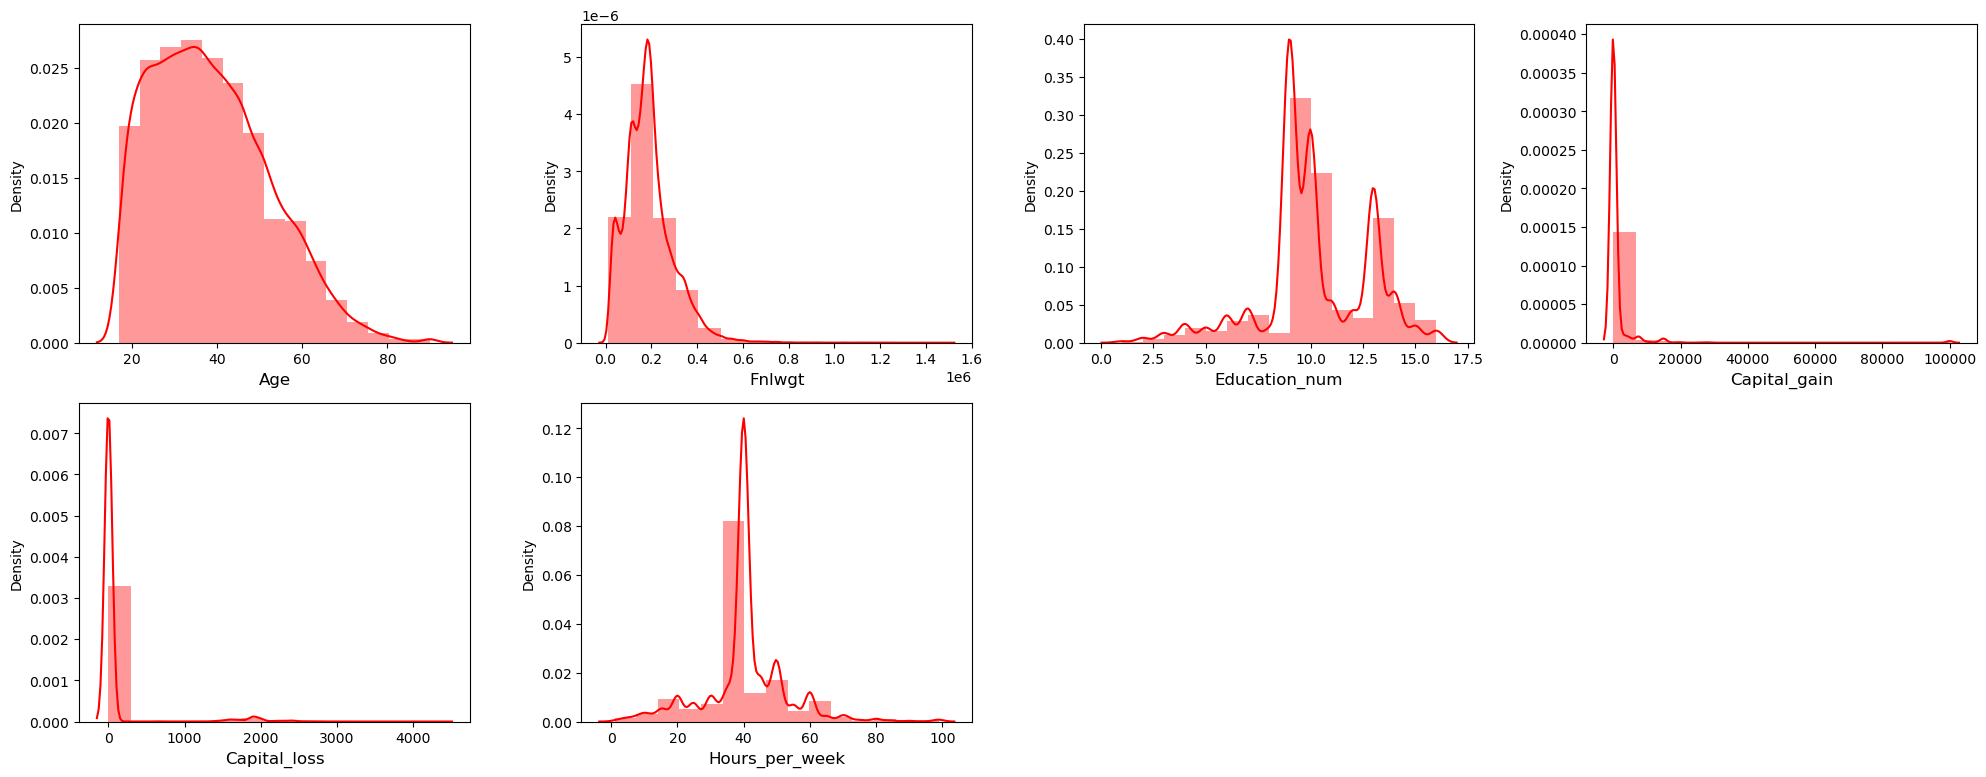

In [268]:
# check data distribution

num=cen_df.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=len(num):
        ax=plt.subplot(4,4,plot)
        sns.distplot(cen_df[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    Age and hours per week are normally distributed
    We can quantify skewness in other columns

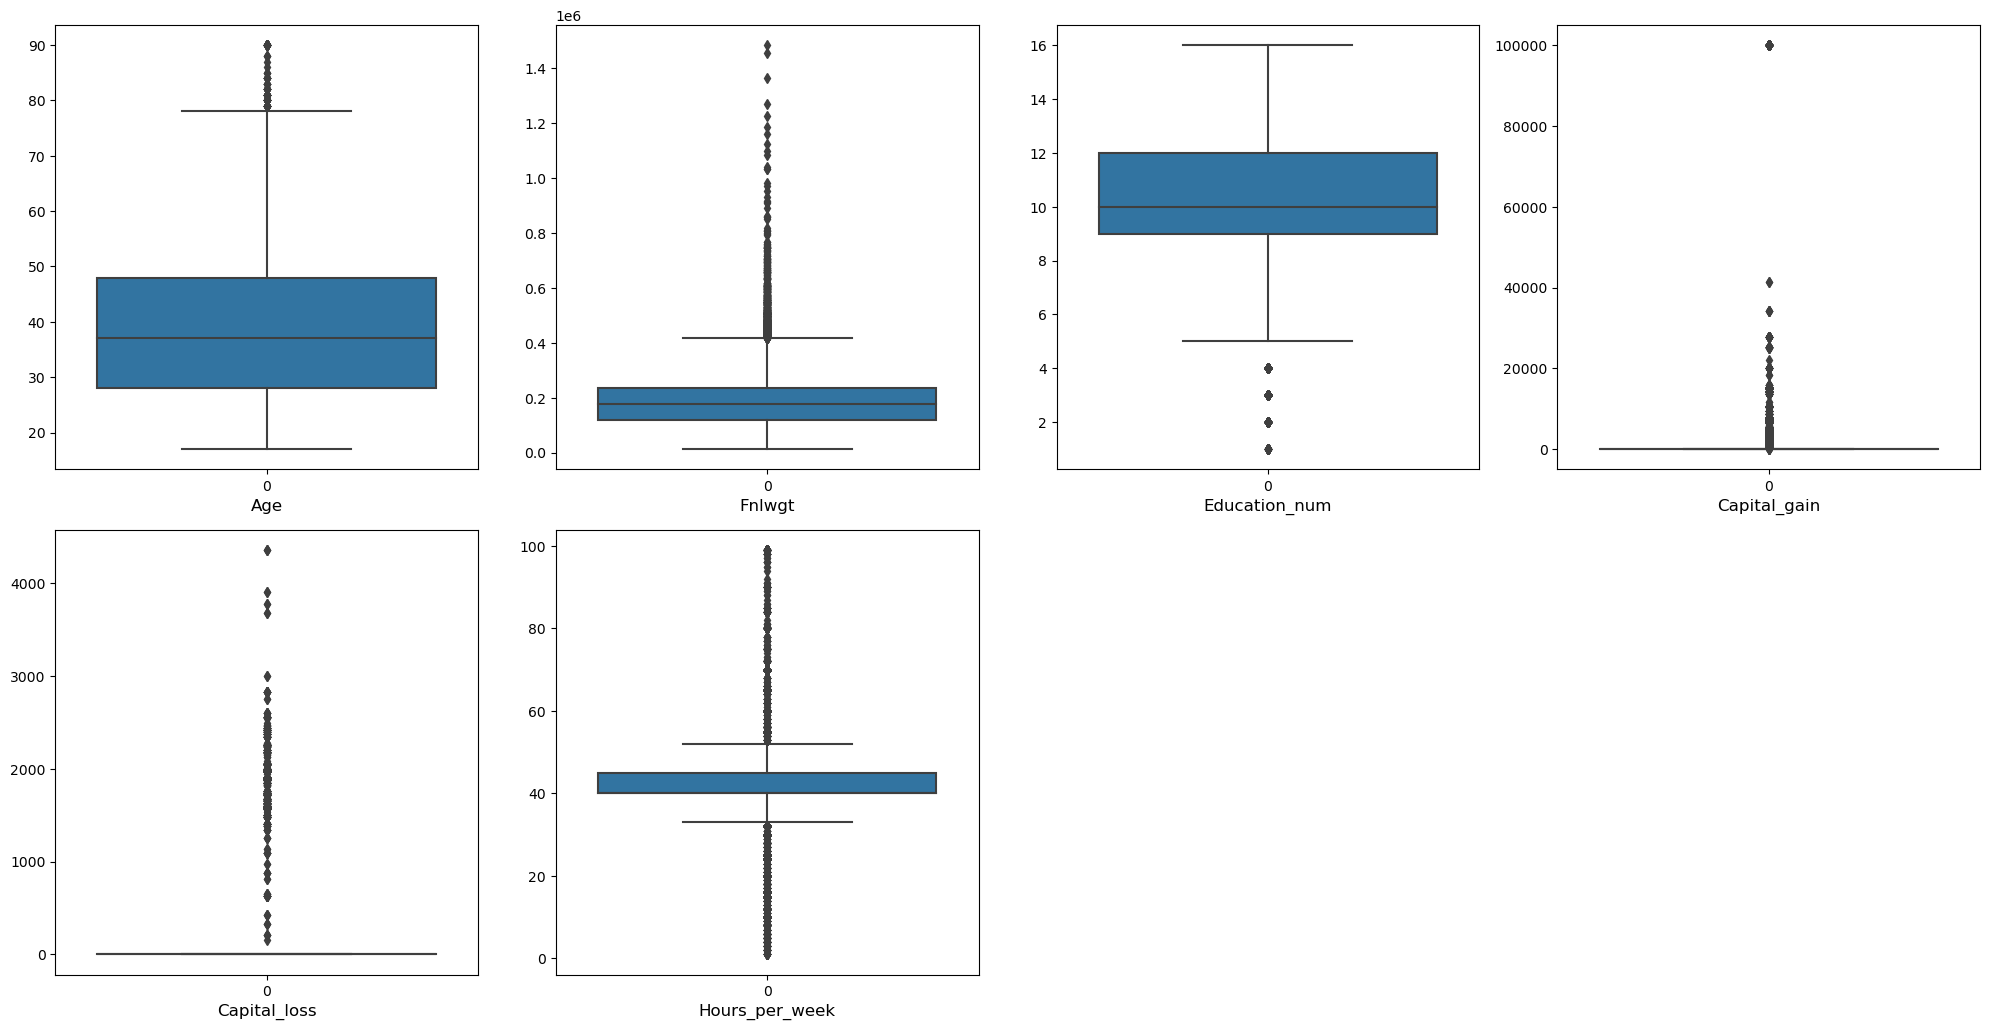

In [269]:
# check for outliers using boxplot

num=cen_df.select_dtypes(include=['float','int'])
plt.figure(figsize=(20,15))
plot=1
for col in flt:
    if plot<=len(num):
        ax=plt.subplot(3,4,plot)
        sns.boxplot(cen_df[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    There are outliers which can be handled using z-score

In [270]:
# outlier removal by z-score and saving the cleaned dataset as av_df2

from scipy.stats import zscore

num=cen_df.select_dtypes(include=['int','float'])
num_cbrt=np.cbrt(cen_df[num.columns])
z=zscore(num_cbrt)
abs_z=np.abs(z)
filter_z=(abs_z<3).all(axis=1)
cen_df1=cen_df[filter_z]
cen_df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [271]:
# check for skewness

num.skew().sort_values(ascending=False)

Capital_gain      11.949245
Capital_loss       4.592622
Fnlwgt             1.447695
Age                0.557657
Hours_per_week     0.228752
Education_num     -0.309454
dtype: float64

In [275]:
# skewness removal by log transformation

cen_df['Capital_gain']=np.log1p(cen_df['Capital_gain'])
cen_df['Capital_loss']=np.log1p(cen_df['Capital_loss'])

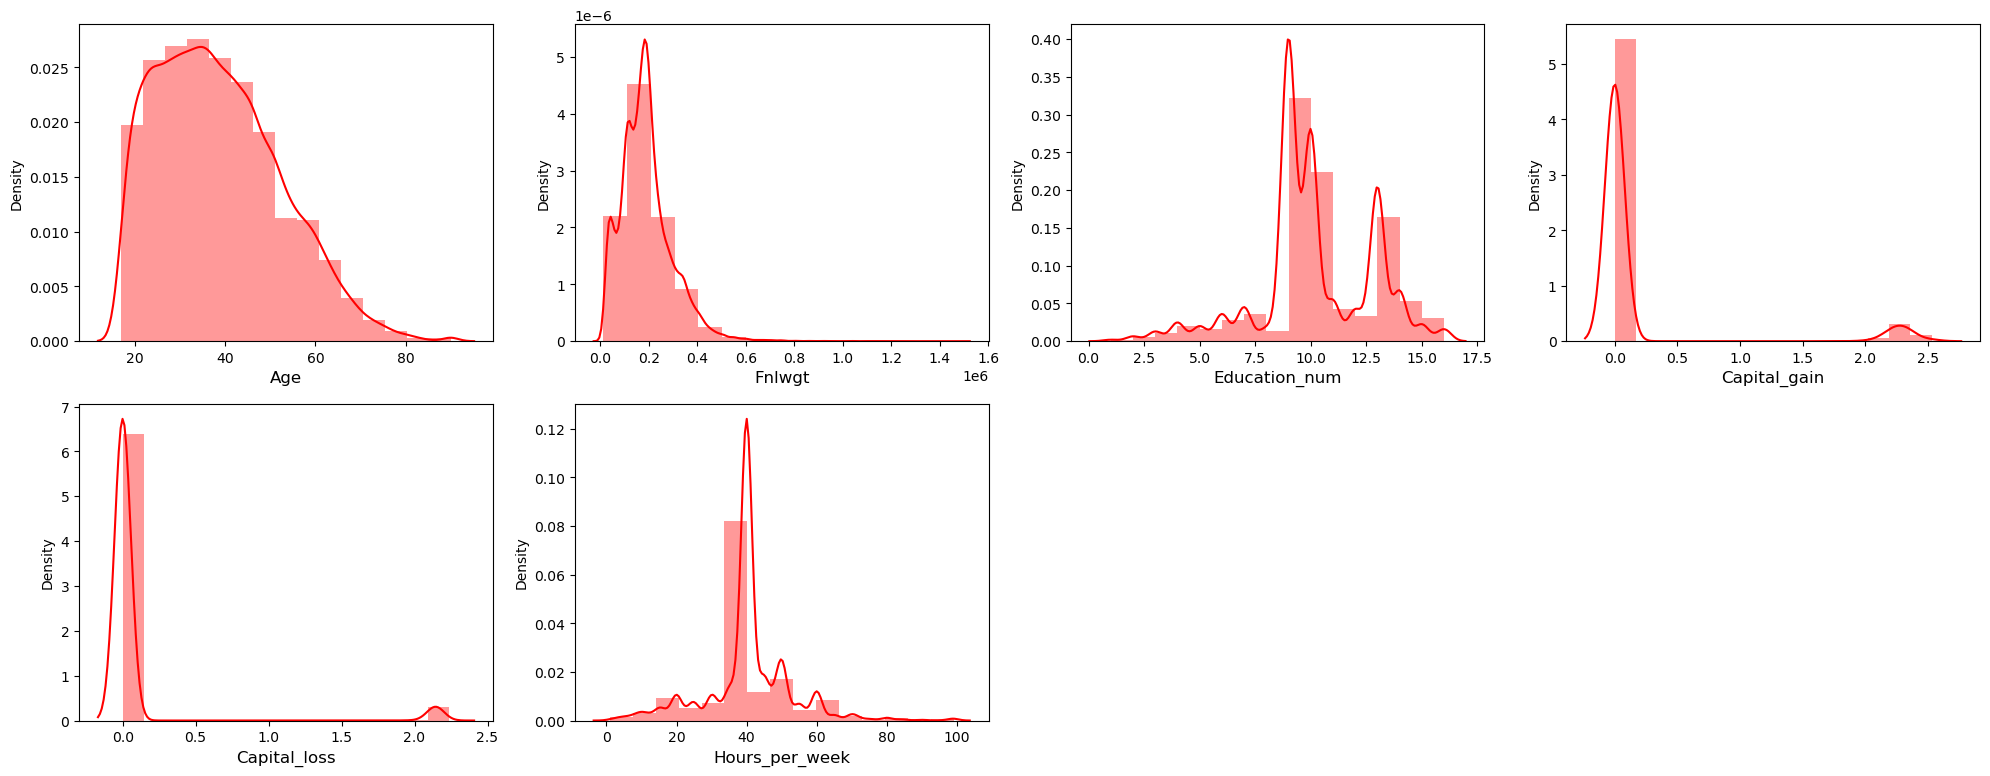

In [276]:
# check data distribution after skewness removal

num=cen_df.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=len(num):
        ax=plt.subplot(4,4,plot)
        sns.distplot(cen_df[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    Skewness has been reduced to a small extend

In [282]:
# remove education column as it is same as education_num 

cen_df1.drop('Education',axis=1,inplace=True)

In [302]:
print('Size of original dataset',cen.shape)
print('Size of dataset after cleaning and pre-processing',cen_df1.shape)
print('Number of rows removed after cleaning and pre-processing',cen.shape[0]-cen_df1.shape[0])

Size of original dataset (32560, 15)
Size of dataset after cleaning and pre-processing (28517, 14)
Number of rows removed after cleaning and pre-processing 4043


In [284]:
# label encode categorical variables

le=LabelEncoder()
cat=cen_df1.select_dtypes(include='object')
for i in cat.columns:
    cen_df1[i]=le.fit_transform(cen_df1[i])
    
cen_df1.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,38,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,38,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,38,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,38,0


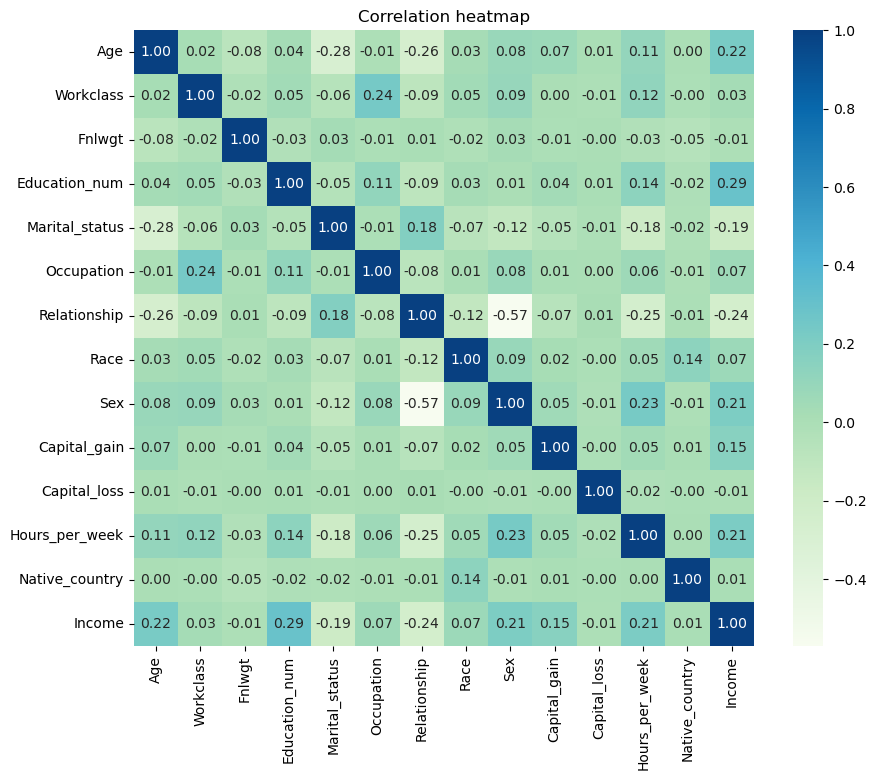

In [286]:
# check for correlation

cm= cen_df1.corr()
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True,cmap='GnBu',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:  

    Income shows low to moderate positive correlation with Education_num,sex,hrs per week and age whereas negative correlation with  relationship and marital status.
    Multicollinearity exists between:
        Sex and relationship (+0.57)
       
   Severity of multicollinearity can be analysed using vif score

# Feature Selection

In [287]:
# confirm multicollinearity by vif 

x=cen_df1.drop(['Income'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
6,Relationship,1.652668
8,Sex,1.532613
0,Age,1.163044
11,Hours_per_week,1.130217
4,Marital_status,1.130053
1,Workclass,1.079399
5,Occupation,1.078103
3,Education_num,1.043163
7,Race,1.040616
12,Native_country,1.023456


Observation:  

    As per the vif score, multicollinearity is minimal

In [288]:
# select top 10 features using SelectKBest

x=cen_df1.drop(['Income'],axis=1)
y=cen_df1['Income']

best=SelectKBest(score_func=f_classif,k=10)
best_features=best.fit(x,y)
selectkbest=pd.DataFrame()
selectkbest['Features']=x.columns
selectkbest['Score']=best_features.scores_
selected_features=selectkbest.sort_values(by='Score',ascending=False).head(10)
display(selected_features)

,Features,Score
3,Education_num,2698.186753
6,Relationship,1787.722670
0,Age,1493.205077
11,Hours_per_week,1355.676313
8,Sex,1281.462385
4,Marital_status,1047.182515
9,Capital_gain,688.346727
7,Race,147.888670
5,Occupation,127.393811
1,Workclass,33.789370


 We can select the top 10 features for model training

In [291]:
selected_features['Features'].value_counts()

Features
Education_num     1
Relationship      1
Age               1
Hours_per_week    1
Sex               1
Marital_status    1
Capital_gain      1
Race              1
Occupation        1
Workclass         1
Name: count, dtype: int64

In [292]:
# splitting data into features(x) and label(y)

x=cen_df1[['Education_num','Relationship','Age','Hours_per_week','Sex','Marital_status','Capital_gain','Race','Occupation','Workclass']]
y=cen_df1['Income']

In [293]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(21387, 10) (21387,) (7130, 10) (7130,)


In [294]:
# check for imbalance in the dataset

income_count=y.value_counts()
pd.DataFrame(income_count)

,count
Income,
0,22675
1,5842


Observation:  

    There is significant imbalance in the label column. So we can use oversampling to bring balance to the data.
    

In [295]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(x_train,y_train)

In [296]:
# check label distribution before and after oversampling
from collections import Counter

print('Label distribution before oversampling: ', Counter(y_train),'\n')

print('Label distribution after oversampling: ', Counter(Y_train))

Label distribution before oversampling:  Counter({0: 17010, 1: 4377}) 

Label distribution after oversampling:  Counter({1: 17010, 0: 17010})


In [297]:
# check shape of train and test sets before and after oversampling

print('No. of feature data b/f smote: ', x_train.shape,'and No. of label data b/f smote: ',y_train.shape,'\n')

print('No. of feature data a/f smote: ', X_train.shape,'and no. of label data a/f smote: ', Y_train.shape)

No. of feature data b/f smote:  (21387, 10) and No. of label data b/f smote:  (21387,) 

No. of feature data a/f smote:  (34020, 10) and no. of label data a/f smote:  (34020,)


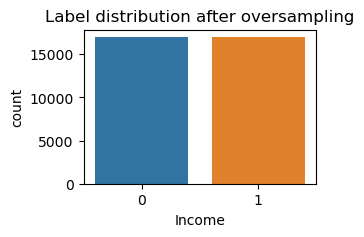

In [298]:
# visualize label distribution after oversampling

ytrain_df=pd.DataFrame(Y_train,columns=['Income'])
plt.figure(figsize=(3,2))
sns.countplot(x='Income', data=ytrain_df)
plt.title('Label distribution after oversampling')
plt.show()

Observation:  
 
    Now the dataset is balanced, and can be used for model building

# MODEL TRAINING & EVALUATION

In [299]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,y_pred1))
    else:
        y_pred2= model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(y_test,y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='YlGnBu',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted Glass Type')
        plt.ylabel('Actual Glass Type')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,x,y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')

Accuracy of train set:  0.7452380952380953
Accuracy of test set:  0.7218793828892006

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.92      0.71      0.80      5665
           1       0.41      0.75      0.53      1465

    accuracy                           0.72      7130
   macro avg       0.66      0.73      0.67      7130
weighted avg       0.81      0.72      0.75      7130



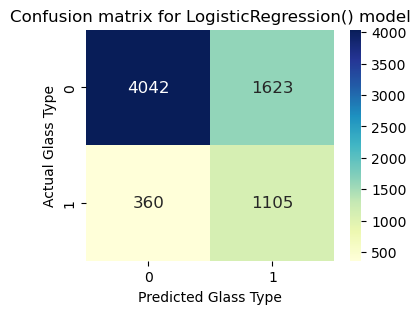


Cross validation score of the LogisticRegression() model : 0.7988215953366243


In [300]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,x_test,y_test,train=True)
score(lr,X_train,Y_train,x_test,y_test,train=False)

cv(lr)

Accuracy of train set:  0.8959729570840682
Accuracy of test set:  0.7772791023842918

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           0       0.92      0.79      0.85      5665
           1       0.47      0.73      0.57      1465

    accuracy                           0.78      7130
   macro avg       0.70      0.76      0.71      7130
weighted avg       0.83      0.78      0.79      7130



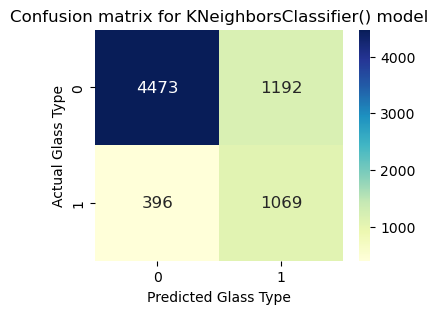


Cross validation score of the KNeighborsClassifier() model : 0.8306976975529474


In [301]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
score(knn,X_train,Y_train,x_test,y_test,train=True)
score(knn,X_train,Y_train,x_test,y_test,train=False)
cv(knn)

Accuracy of train set:  0.9818048206937096
Accuracy of test set:  0.7966339410939691

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      5665
           1       0.50      0.53      0.52      1465

    accuracy                           0.80      7130
   macro avg       0.69      0.70      0.69      7130
weighted avg       0.80      0.80      0.80      7130



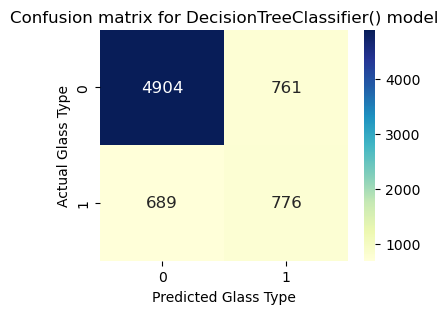


Cross validation score of the DecisionTreeClassifier() model : 0.8011011035012945


In [303]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,x_test,y_test,train=True)
score(dt,X_train,Y_train,x_test,y_test,train=False)
cv(dt)

Accuracy of train set:  0.9817754262198707
Accuracy of test set:  0.829312762973352

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5665
           1       0.58      0.59      0.59      1465

    accuracy                           0.83      7130
   macro avg       0.74      0.74      0.74      7130
weighted avg       0.83      0.83      0.83      7130



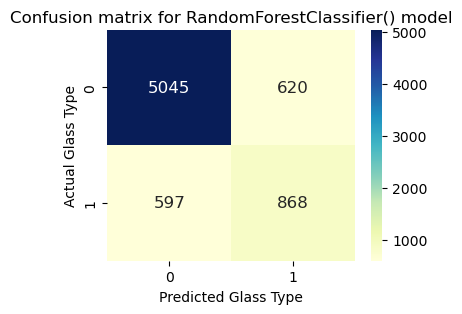


Cross validation score of the RandomForestClassifier() model : 0.8393591842486388


In [304]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,x_test,y_test,train=True)
score(rf,X_train,Y_train,x_test,y_test,train=False)
cv(rf)

Accuracy of train set:  0.8296590241034686
Accuracy of test set:  0.7598877980364657

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.95      0.73      0.83      5665
           1       0.46      0.86      0.60      1465

    accuracy                           0.76      7130
   macro avg       0.70      0.80      0.71      7130
weighted avg       0.85      0.76      0.78      7130



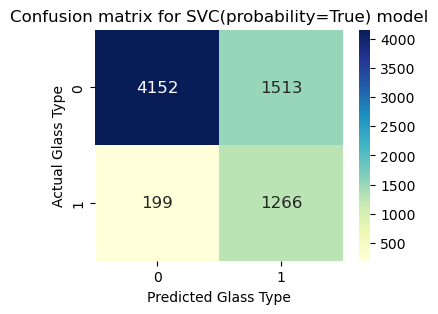


Cross validation score of the SVC(probability=True) model : 0.8046429513857891


In [305]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,x_test,y_test,train=True)
score(svc,X_train,Y_train,x_test,y_test,train=False)
cv(svc)

Accuracy of train set:  0.8584362139917695
Accuracy of test set:  0.8056100981767181

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.95      0.80      0.87      5665
           1       0.52      0.82      0.64      1465

    accuracy                           0.81      7130
   macro avg       0.73      0.81      0.75      7130
weighted avg       0.86      0.81      0.82      7130



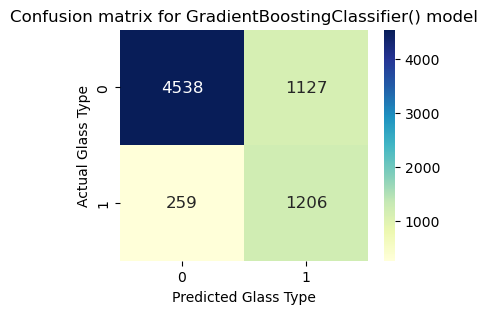


Cross validation score of the GradientBoostingClassifier() model : 0.8573484674658818


In [311]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,x_test,y_test,train=True)
score(gbc,X_train,Y_train,x_test,y_test,train=False)
cv(gbc)

Accuracy of train set:  0.9137566137566138
Accuracy of test set:  0.8356241234221599

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model  :

               precision    recall  f1-score   support

           0       0.92      0.87      0.89      5665
           1 

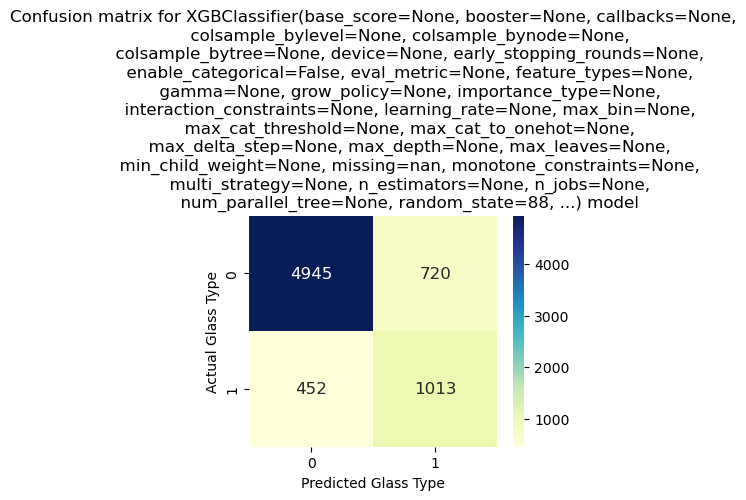


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model : 0.859031650623586


In [307]:
# XGBoost
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=88)
xg.fit(X_train,Y_train)

score(xg,X_train,Y_train,x_test,y_test,train=True)
score(xg,X_train,Y_train,x_test,y_test,train=False)
cv(xg)

F1 score of Logistic Regression model is  0.5270689243978057
F1 score of Decision Tree model is  0.5186666666666666
F1 score of KNN model is  0.5738056897477187
F1 score of Random Forest model is  0.586720867208672
F1 score of SVC model is  0.5966069745523092
F1 score of Gradient Boosting model is  0.6350710900473935
F1 score of XGBoosting model is  0.6335209505941213


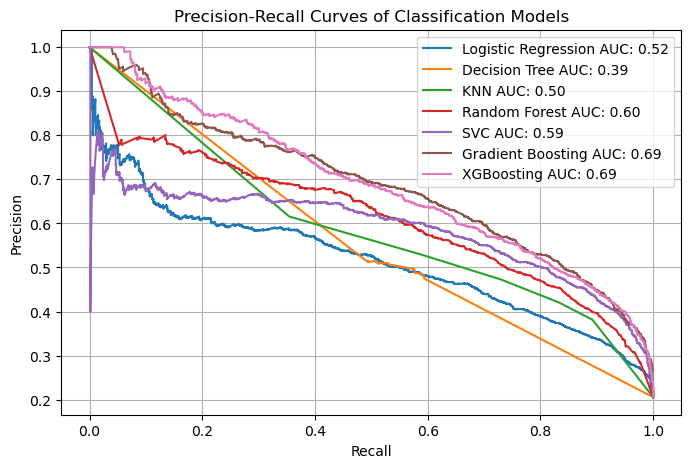

In [308]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'Decision Tree': dt,'KNN': knn, 'Random Forest': rf,'SVC': svc,
          'Gradient Boosting': gbc,'XGBoosting':xg}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observation:  

    We select GradientBoosting Classifier(gbc) as the best model with the highest test accuracy (0.80) and highest F1 score (0.635) indicating that the model can classify income groups better than other models. The model shows:-
    
        Accuracy of train set:  0.858
        Accuracy of test set:  0.805
        Cross validation score : 0.857
        F1 score : 0.635
        AUC : 0.69
        
        There is minimal overfitting in the model as the train and test accuracy are closer values.
        Number of False Negatives are also lesser in comparison to the other models with good CV score.

In [309]:
# Hyperparameter tuning of the selected model (GradientBoostingClassifier) using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators': [50,100,150,200,250], 'learning_rate':[0.001,0.01,0.1,1], 'max_depth':range(1,30,5), 
        'min_samples_leaf':[1,2,4], 'max_leaf_nodes':[10,15,20]}

rs=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=params,scoring='accuracy',cv=5)

rs.fit(X_train,Y_train)

print(f'Best parameters for GradientBoosting model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for GradientBoosting model: {'n_estimators': 250, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_depth': 6, 'learning_rate': 0.1} and best score is : 0.8843621399176955


Accuracy of train set:  0.9130217519106408
Accuracy of test set:  0.8417952314165498

Classification report of GradientBoostingClassifier(max_depth=6, max_leaf_nodes=20, n_estimators=250) model  :

               precision    recall  f1-score   support

           0       0.92      0.88      0.90      5665
           1       0.60      0.70      0.64      1465

    accuracy                           0.84      7130
   macro avg       0.76      0.79      0.77      7130
weighted avg       0.85      0.84      0.85      7130



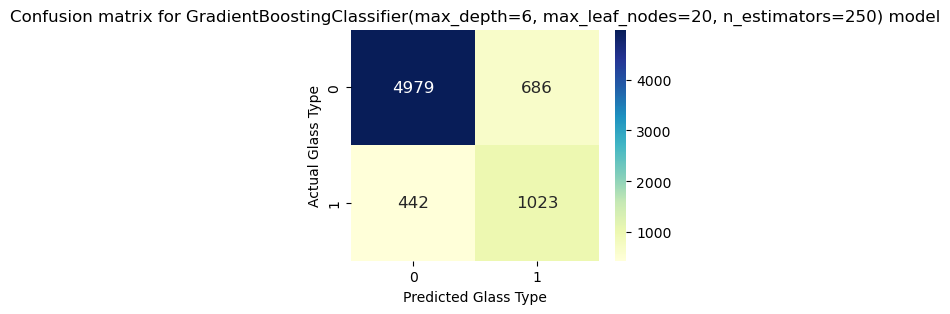


Cross validation score of the GradientBoostingClassifier(max_depth=6, max_leaf_nodes=20, n_estimators=250) model : 0.859768117417594


In [317]:
# Gradient Boosting

gbc1=rs.best_estimator_
gbc1.fit(X_train,Y_train)

score(gbc1,X_train,Y_train,x_test,y_test,train=True)
score(gbc1,X_train,Y_train,x_test,y_test,train=False)
cv(gbc1)

F1 score of Untuned GradientBoost model is  0.6350710900473935
F1 score of Tuned GradientBoost model is  0.6446124763705103


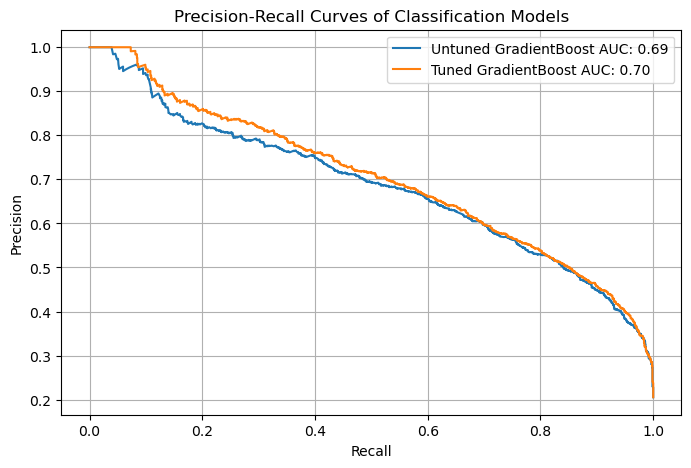

In [318]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Untuned GradientBoost': gbc,'Tuned GradientBoost': gbc1}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observation:  

    There has been improvement in the test metrics after hyperparameter tuning. So we'll proceed with the tuned Gradient Boosting model model having:

        Accuracy of train set:  0.91
        Accuracy of test set:  0.84
        Cross validation score : 0.86
        F1 score : 0.4
        AUC : 0.70


In [319]:
# Save Gradient Boosting model

pickle.dump(gbc1, open('Income_prediction_gbc1_model.pkl','wb'))

In [320]:
# load model and view prediction vs actual loan_status

Income_prediction_model=pickle.load(open('Income_prediction_gbc1_model.pkl','rb'))
y_pred=Income_prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result.tail()

,Predicted,Actual
24276,0,0
25984,0,0
1607,0,0
8291,0,0
9856,1,1


Observation:  

    The Gradient Boosting model (gbc1) was able to predict whether a person makes over $50K a year with 84% test accuracy.

# Overall Summary

The dataset on "Census Income" was used to analyse and build machine learning models to predict whether a person makes over $50K a year, on the basis of the details provided in the dataset(Classification model).

Actions done with the dataset:  
1. Data cleaning - removal of unwanted columns, outlier removal, managing skewness, 4043 rows were removed during pre-processing steps 
2. Exploratory Data Analysis - descriptive and graphical analysis of data
3. Feature Engineering -  scaling of data,categorical encoding, log transformation to manage skewness
4. Model training and evaluation- trained 7 models for the classification problem; evaluated the models using appropriate metrics to find the best model


# Data Insights

    DESCRIPTIVE ANALYSIS:
    

    Income category explains that 75.91% people earn less than or equal to $50,000 per year. Only 24.09% of the population have annual income >50K
    
    The census data covered more private working class than others. Private class working population covers 69.69% of the total working class.
    
    The education status of most individuals were High-school graduation
    14970 people are married and living with their spouse
    
    Top 3 common occupations are craft repair, professional-speciality and executive-managerial
    
    White people represents majority of the population (85.43%)
    
    Average age of the population is 38.5 years
    
    Male gender (especially married husbands) is prominent in the dataset
    
    Majority people have zero capital gain/loss
    
    Common working hour is 40h/week
    
    Data represents population of USA mostly



    INFERENTIAL ANALYSIS:
    
    78.12% private employees earn income <=50K while 21.88% earn income >50K
    
    21.83% people who has worked for more than the average 40 hrs/week work hours, earns >50K income
    
    People with HS graduation earn income <=50K while people with bachelors degree is found to earn >50K 
    
    Majority of married people tend to earn >50K which can be because of the increased responsibilities. Unmarried people majorly earns <=50K
    
    Majority of Admn-clerical earns <=50K while Exec-managerial tends to earn more
    
    Male gender earns more than female gender which maybe due to the inequal gender proportion in the sampling
    
    Income is slighly higher for people with more age

    Weights are equally distributed for both categories of income
    
    Education level is higher for high-income class
    
    Capital gain and loss is signifcantly high for people with >50K income



# Selected model


    Gradient Boosting model was found to be the best model for the classification task to predict the loan application status. The model was selected based on below metrics:

    Accuracy of train set:  0.91
    Accuracy of test set:  0.84
    Cross validation score : 0.86
    F1 score : 0.4
    AUC : 0.70

        There is minimal overfitting in the Gradient Boosting model as the train and test accuracy are closer values. 